In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_cancer = pd.read_csv('cancer.csv')
data_cancer

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,NaN,NaN,NaN
695,841769,2,1,1,1,2,1,1,1,1,2,NaN,NaN,NaN
696,888820,5,10,10,3,7,3,8,10,2,4,NaN,NaN,NaN
697,897471,4,8,6,4,3,4,10,6,1,4,NaN,NaN,NaN


In [ ]:
'''the dataset explains the physical and chemical charecteristics of a cancer cell,we need to observe the correlation
or inter-dependency of these features and apply pca to eliminate the redundancy and consider values that show high
variance for stabilized predictions.'''

In [4]:
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 14 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
Unnamed: 11                    0 non-null float64
Unnamed: 12                    0 non-null float64
Unnamed: 13                    0 non-null float64
dtypes: float64(3), int64(10), object(1)
memory usage: 76.6+ KB


In [5]:
data_cancer.shape

(699, 14)

In [6]:
data_cancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,0.0,0.0,0.0
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557,NaN,NaN,NaN
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273,NaN,NaN,NaN
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000,NaN,NaN,NaN
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,NaN,NaN,NaN


In [7]:
data_cancer.isnull().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
Unnamed: 11                     True
Unnamed: 12                     True
Unnamed: 13                     True
dtype: bool

In [ ]:
'''we can observe that the last 3 columns neither have proper names/description and most of the values are missing,
lets check how many missing values do we have'''

In [12]:
cols = data_cancer.columns[-1:-4:-1]

for i in cols:
    print(data_cancer[i].unique)


<bound method Series.unique of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
694   NaN
695   NaN
696   NaN
697   NaN
698   NaN
Name: Unnamed: 13, Length: 699, dtype: float64>
<bound method Series.unique of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
694   NaN
695   NaN
696   NaN
697   NaN
698   NaN
Name: Unnamed: 12, Length: 699, dtype: float64>
<bound method Series.unique of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
694   NaN
695   NaN
696   NaN
697   NaN
698   NaN
Name: Unnamed: 11, Length: 699, dtype: float64>


In [ ]:
'''the unnamed columns are completely hollow with no values, they add no value to our analysis, lets remove these 
columns'''

In [22]:
# delete ID,'Unnamed: 13', 'Unnamed: 12', 'Unnamed: 11' COLUMNS

columns = cols.values.tolist()
columns.append('ID')

In [23]:
data_cancer.drop(columns,axis=1,inplace=True)
data_cancer

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [25]:
# lets observe the class variable, as it doesnot seem to be a charecteristic of the cancer cell, 
#its probably the target
data_cancer['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [ ]:
'''we can see that the cancer cells are categorised into two classes,2 and 4 , and it is not a charecteristic of the
cell , so there is no need to take that into consideration.'''

In [26]:
# drop class
data_cancer.drop('Class',axis=1,inplace=True)
data_cancer

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [27]:
# now lets observe the individual features and verify their validity(null valus,special charecters,outliers)
#Clump Thickness
data_cancer['ClumpThickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9])

In [28]:
data_cancer['ClumpThickness'].describe()

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: ClumpThickness, dtype: float64

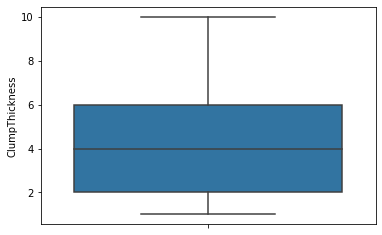

In [29]:
sns.boxplot(y='ClumpThickness',data=data_cancer)

In [ ]:
'''the clumpthickness column has valid values, without any null values or special charecters and outliers'''

[ 1  4  8 10  2  3  7  5  6  9]


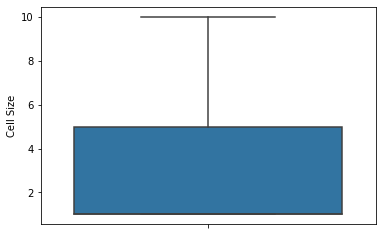

In [31]:
#Cell Size
print(data_cancer['Cell Size'].unique())
sns.boxplot(y='Cell Size',data=data_cancer)

[ 1  4  8 10  2  3  5  6  7  9]


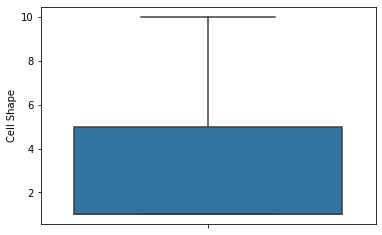

In [33]:
#Cell Shape
print(data_cancer['Cell Shape'].unique())
sns.boxplot(y='Cell Shape',data=data_cancer)

[ 1  5  3  8 10  4  6  2  9  7]


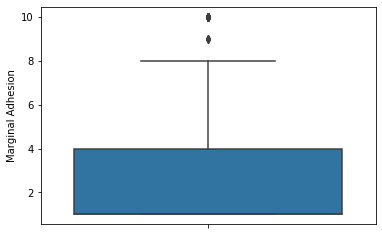

In [34]:
#Marginal Adhesion
print(data_cancer['Marginal Adhesion'].unique())
sns.boxplot(y='Marginal Adhesion',data=data_cancer)

[ 2  7  3  1  6  4  5  8 10  9]


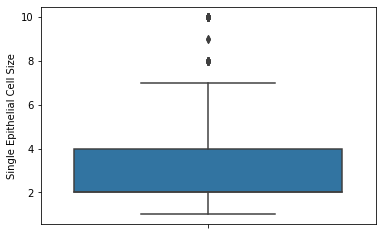

In [35]:
#Single Epithelial Cell Size
print(data_cancer['Single Epithelial Cell Size'].unique())
sns.boxplot(y='Single Epithelial Cell Size',data=data_cancer)

In [40]:
#Bare Nuclei
print(data_cancer['Bare Nuclei'].unique())


['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [ ]:
'''there are missing values in the column and also the values are given a string type,to understand the validity of
this data we need to understand the concept behind the bare nuclei and its nature

Bare Nucleus is a nucleus in a cytologic preparation that is virtually devoid of cytoplasm,
which is typically seen in cell degeneration.

so the presence or absence and their number decides the type of cancer beningn/malignant

so this can be coverted to integer column and the null values can be replaced by the mean of similar charecterstics.'''

In [75]:
data_cancer[data_cancer['Bare Nuclei']=='?']

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
23,8,4,5,1,2,?,7,3,1
40,6,6,6,9,6,?,7,8,1
139,1,1,1,1,1,?,2,1,1
145,1,1,3,1,2,?,2,1,1
158,1,1,2,1,3,?,1,1,1
164,5,1,1,1,2,?,3,1,1
235,3,1,4,1,2,?,3,1,1
249,3,1,1,1,2,?,3,1,1
275,3,1,3,1,2,?,2,1,1
292,8,8,8,1,2,?,6,10,1


In [ ]:
'''lets consider those columns as the reference that has 3/th of the values as a single value, here its
Marginal Adhesion,Single Epithelial Cell Size,Mitoses'''

In [80]:
# lets first replace '?' with '0' and convert the whole column to int
data_cancer['Bare Nuclei'].replace('?','0',inplace=True)
data_cancer['Bare Nuclei']=data_cancer['Bare Nuclei'].astype('int')

In [81]:
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9)
memory usage: 49.3 KB


In [84]:
data_cancer[data_cancer['Bare Nuclei']==0]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
23,8,4,5,1,2,0,7,3,1
40,6,6,6,9,6,0,7,8,1
139,1,1,1,1,1,0,2,1,1
145,1,1,3,1,2,0,2,1,1
158,1,1,2,1,3,0,1,1,1
164,5,1,1,1,2,0,3,1,1
235,3,1,4,1,2,0,3,1,1
249,3,1,1,1,2,0,3,1,1
275,3,1,3,1,2,0,2,1,1
292,8,8,8,1,2,0,6,10,1


In [89]:
bare_nuclei_value = data_cancer[(data_cancer['Marginal Adhesion']==1) & 
                                (data_cancer['Single Epithelial Cell Size']==2) & 
                                (data_cancer['Mitoses']==1)]['Bare Nuclei'].median()

In [90]:
# replace with median
data_cancer['Bare Nuclei'].replace(0,bare_nuclei_value,inplace=True)

[ 3  9  1  2  4  5  7  8  6 10]


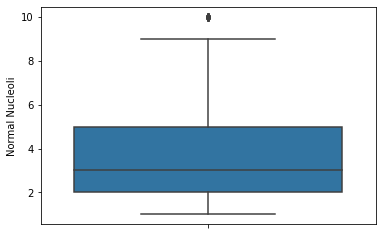

In [37]:
#Normal Nucleoli
print(data_cancer['Normal Nucleoli'].unique())
sns.boxplot(y='Normal Nucleoli',data=data_cancer)

[ 1  2  7  4  5  3 10  6  9  8]


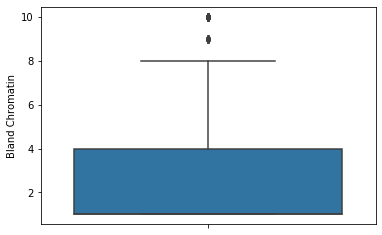

In [38]:
#Bland Chromatin
print(data_cancer['Bland Chromatin'].unique())
sns.boxplot(y='Bland Chromatin',data=data_cancer)

[ 1  5  4  2  3  7 10  8  6]
count    699.000000
mean       1.589413
std        1.715078
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: Mitoses, dtype: float64


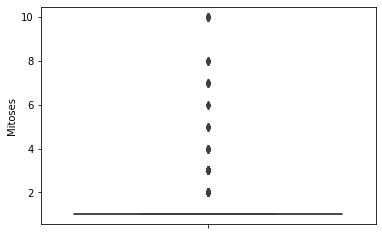

In [42]:
#Mitoses
print(data_cancer['Mitoses'].unique())
sns.boxplot(y='Mitoses',data=data_cancer)
print(data_cancer['Mitoses'].describe())

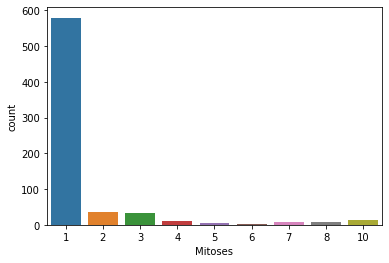

In [56]:
sns.countplot(data_cancer['Mitoses'])

In [59]:
q1 = np.quantile(data_cancer['Mitoses'],0.25)
q3 = np.quantile(data_cancer['Mitoses'],0.75)
print("majority of the data of mitoses lies within the range of:",(q1,q3))

majority of the data of mitoses lies within the range of: (1.0, 1.0)


In [ ]:
'''basically majority of the data has values=1 , therefore the explaination of the corresponding boxplot being a line
with no significant range , and the rest are considered as outliers , their presence is important to capture that
pattern and understand similar data, here the extreme values are not useless and cant be eliminated'''

In [32]:
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(8), object(1)
memory usage: 49.3+ KB


In [92]:
data_cancer.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [ ]:
'''now we have a cleaned dataset that is devoid of null values , special charecters , unknown invalid columns
, changed categorical columns to numerical,now lets scale the data and see the feature inter-dependency through 
covariance matrices and scatter plots'''

In [94]:
# scaling the data
from scipy.stats import zscore
X_std = data_cancer.apply(zscore)
X_std.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


In [97]:
# correlation matrix
X_std.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


In [ ]:
'''as we can see in the above matrix and can say quantitatively that the features are highly correlated
with each other, creating a lot of redundancy, lets observe the same qualitatively'''

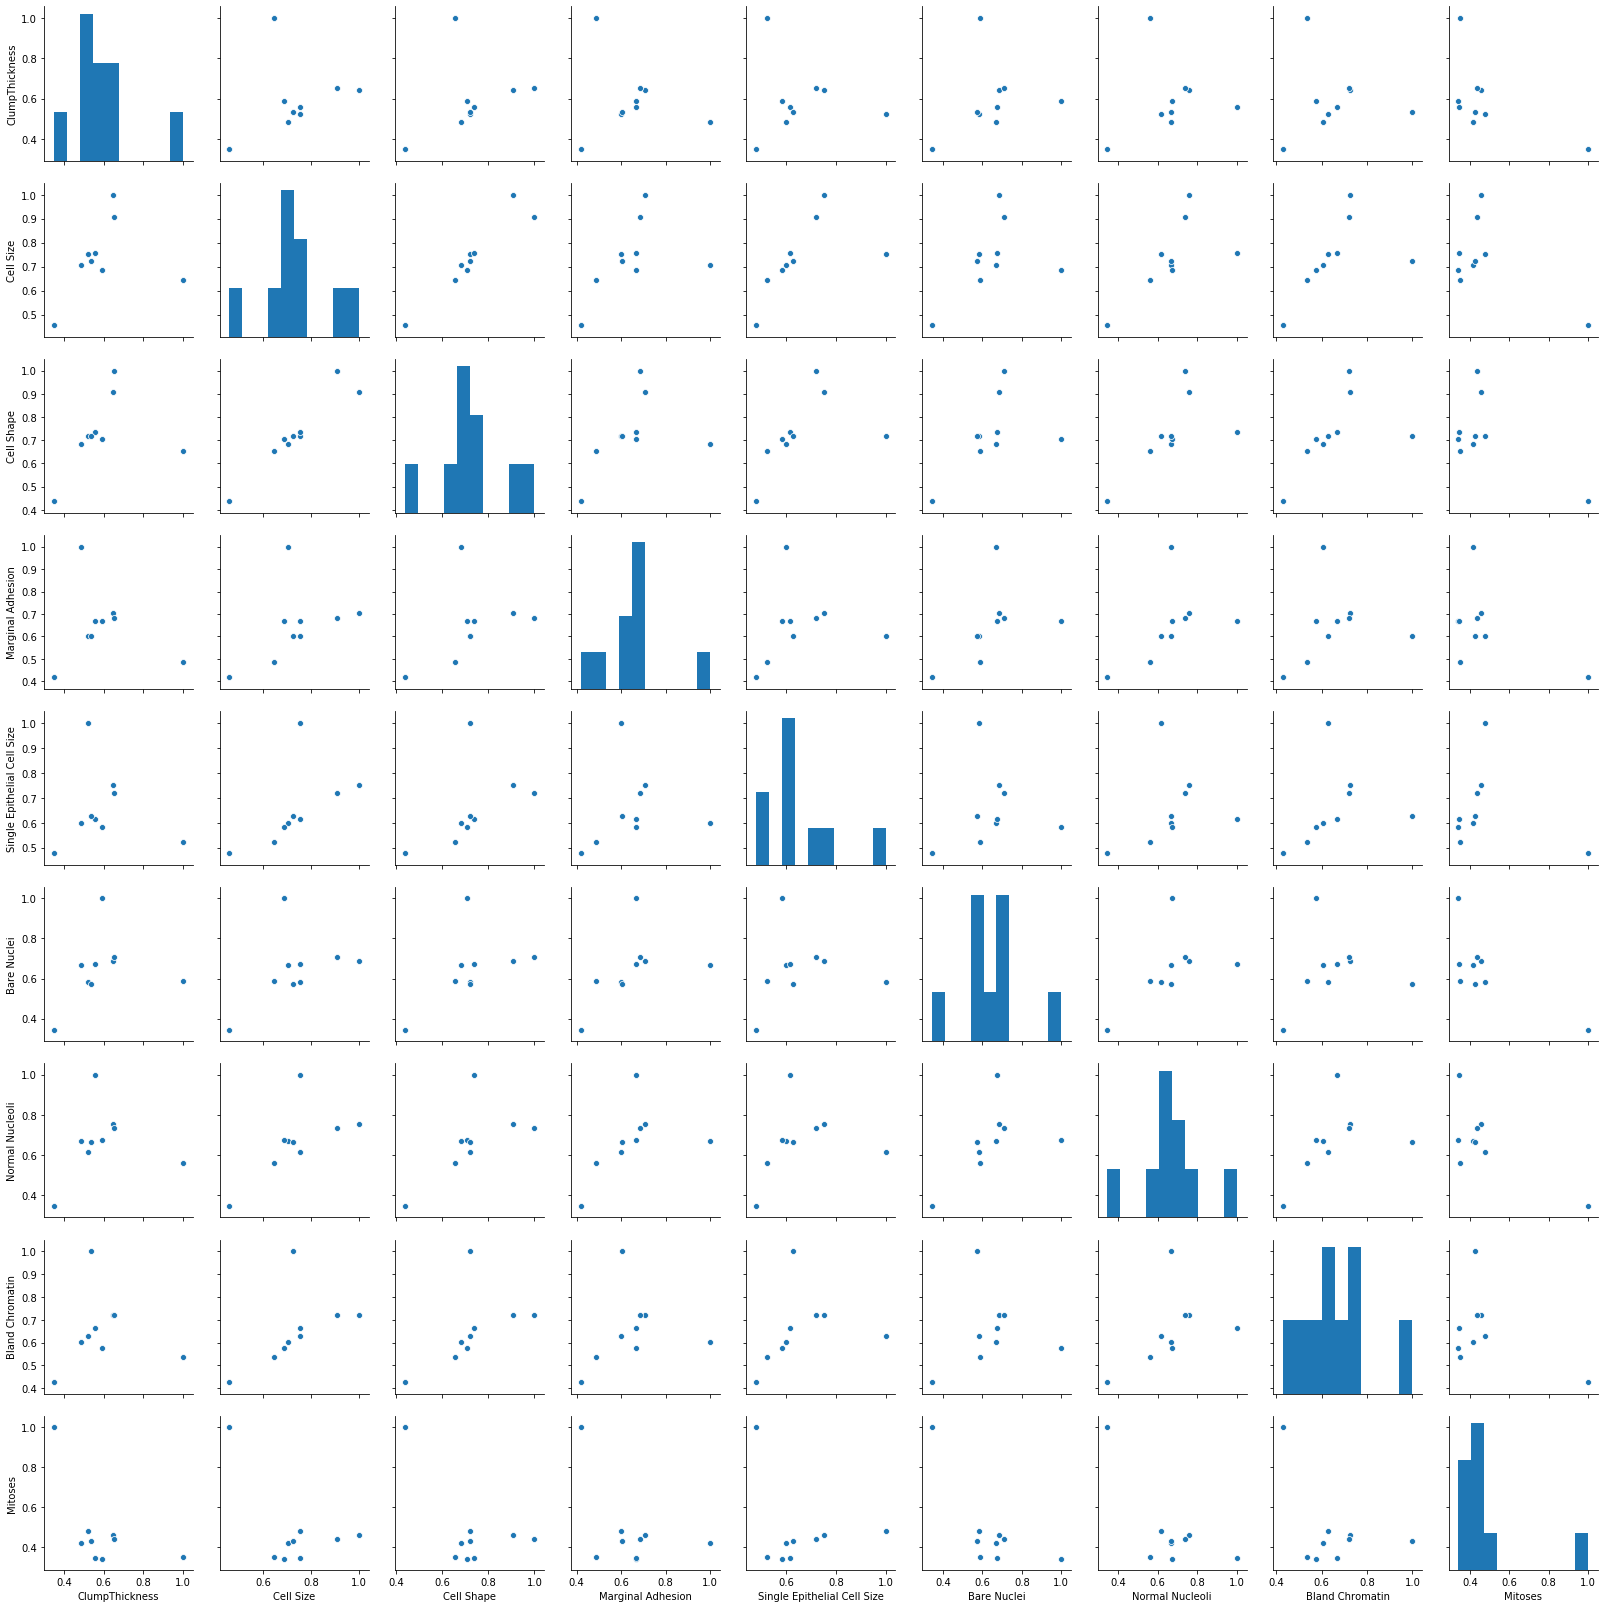

In [103]:
# correlation graphically
sns.pairplot(X_std.corr())
plt.show()

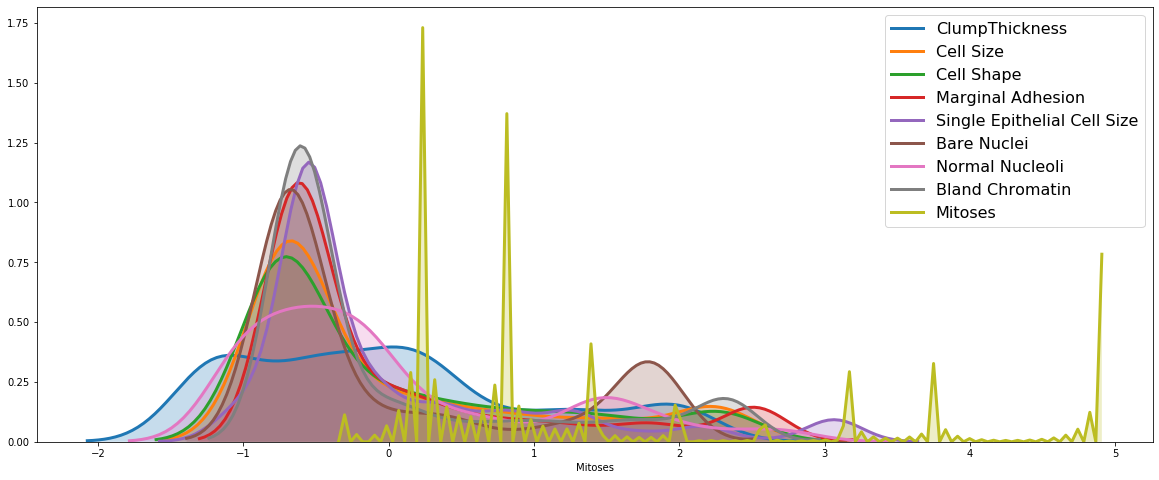

In [98]:
plt.figure(figsize=(20,8))

for i in X_std.columns:
    sns.distplot(X_std[i], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = i)
    
plt.legend(prop={'size': 16})

In [ ]:
'''the overlapping zone between -1 to 0 contibutes to the redundancy , which has to be elimated through PCA.
from the correlation matrix, from the pairplot and also from the above density plot, we can holistically observe
that the mitoses feature is less correlated with the rest of the features.'''

In [104]:
# steps for PCA
from sklearn.decomposition import PCA

model_pca = PCA(n_components=9)
pca_val = model_pca.fit_transform(X_std)
pca_val.shape

(699, 9)

In [105]:
pca_val

array([[-1.45622036e+00, -1.10210430e-01, -5.74438122e-01, ...,
         3.26012855e-01,  4.32567252e-01, -2.05383562e-03],
       [ 1.46627924e+00, -5.44893512e-01,  2.83037529e-01, ...,
        -1.04321397e+00,  3.62242331e-01,  1.94377230e-02],
       [-1.57931140e+00, -7.48535908e-02,  3.74126991e-02, ...,
         2.13147609e-01,  2.32936246e-01,  1.72242868e-02],
       ...,
       [ 3.82535870e+00, -1.80465589e-01,  6.57548033e-01, ...,
         6.57042593e-01, -5.40939643e-01, -6.19978090e-02],
       [ 2.26948193e+00, -1.11343514e+00,  9.90378601e-01, ...,
         1.65239748e+00, -9.64129530e-02,  4.09108681e-01],
       [ 2.66445312e+00, -1.19724198e+00,  1.07725038e+00, ...,
         1.85158386e+00, -3.28356659e-01, -7.81412511e-02]])

In [111]:
#eigen vectors
eigenvectors=model_pca.components_

In [110]:
# eigen values
eigenvalues=model_pca.explained_variance_

In [112]:
# lets observe the variance each vector is explaining
tot = sum(eigenvalues)
var_exp = [(i/tot)*100 for i in sorted(eigenvalues,reverse=True)]
cum_var = np.cumsum(var_exp)
print("cumulative variance :",cum_var)

cumulative variance : [ 65.4457038   74.05429355  80.04128903  85.21615907  89.44363313
  92.81719904  96.10243391  99.01309194 100.        ]


In [ ]:
'''we can observe that the first 5 components are covering almost 90 percent of the data, rest can be seen as a
part that is contributing to the redundancy and is not that crucial for building good clusters.'''

In [113]:
# lets do  kmeans clustering on pca data and observe the results by changing the number of pcs
from sklearn.cluster import KMeans

m1 = KMeans(n_clusters=2,n_init=15,random_state=2)
m1.fit(pca_val)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [114]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df

,0,1,2,3,4,5,6,7,8
0,-1.578012,0.071698,0.014375,0.018155,-0.001263,0.023120,0.024910,0.014914,-0.006515
1,3.156023,-0.143396,-0.028750,-0.036311,0.002526,-0.046239,-0.049821,-0.029827,0.013030


In [ ]:
'''we can observe the closeness in the centroids for the last 5 pcs, they are not contributing to form 
significant clusters'''

In [115]:
# inertia
m1.inertia_

2799.8882067246927

In [117]:
from sklearn import metrics
metrics.silhouette_score(pca_val,m1.labels_)

0.574036592860899

In [118]:
# lets do clustering by changing the number of pcs and lets check the scores and the quality of clustering
model_pca5 = PCA(n_components=5)
pca_val5 = model_pca5.fit_transform(X_std)
pca_val5.shape

(699, 5)

In [119]:
m2 = KMeans(n_clusters=2,n_init=15,random_state=2)
m2.fit(pca_val5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [120]:
centroids5=m2.cluster_centers_
centroid_df5 = pd.DataFrame(centroids5) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df5

,0,1,2,3,4
0,-1.588383,0.069342,0.013704,0.017373,-0.001977
1,3.136212,-0.136914,-0.027059,-0.034303,0.003904


In [121]:
m2.inertia_

2137.5076135817744

In [122]:
from sklearn import metrics
metrics.silhouette_score(pca_val5,m2.labels_)

0.6220623175943673

In [ ]:
'''the inertia dropped indicating the formation of dense clusters and the sil score improved indicationg the
formation of distinct clusters'''

In [124]:
## from the centroids above we can figure out that we will get ideal performance and clusters if we consider only 2pcs
model_pca2 = PCA(n_components=2)
pca_val2 = model_pca2.fit_transform(X_std)
pca_val2.shape

(699, 2)

In [125]:
m3 = KMeans(n_clusters=2,n_init=15,random_state=2)
m3.fit(pca_val2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [126]:
centroids2=m3.cluster_centers_
centroid_df2 = pd.DataFrame(centroids2) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df2

,0,1
0,-1.588383,0.069342
1,3.136212,-0.136914


In [127]:
m3.inertia_

1170.0454278965713

In [128]:
metrics.silhouette_score(pca_val2,m3.labels_)

0.7346062137299392

In [ ]:
'''so 2 dinstict clusters are formed when considered 2 pc components and we can now compare these 2 clusters with the
original ones ond observe the difference'''

In [129]:
df_k = data_cancer.copy(deep=True)
df_k['label'] = m3.labels_

In [130]:
df_k['label'].value_counts()

0    464
1    235
Name: label, dtype: int64

In [136]:
data = pd.read_csv('cancer.csv')
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN


In [146]:
print('Original Data Classes:')
print(data['Class'].value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    458
4    241
Name: Class, dtype: int64
------------------------------
Predicted Data Classes:
0    464
1    235
Name: label, dtype: int64


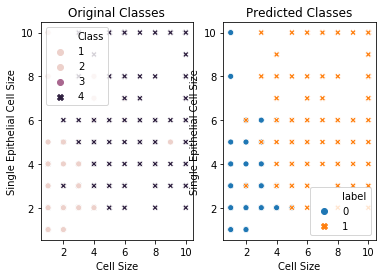

In [151]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='Cell Size', y='Single Epithelial Cell Size', hue='Class', style='Class', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='Cell Size', y='Single Epithelial Cell Size', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

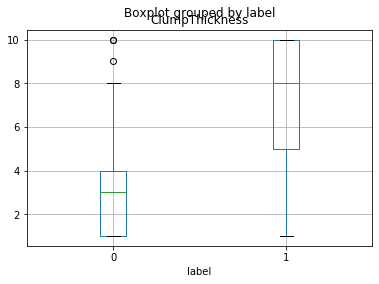

In [133]:
df_k.boxplot(column='ClumpThickness',by='label')

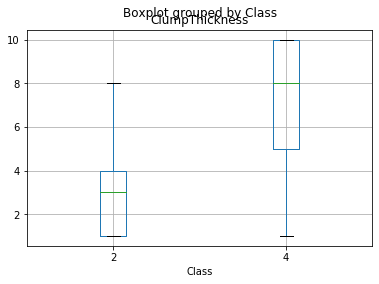

In [145]:
data.boxplot(column='ClumpThickness',by='Class')

In [ ]:
'''we can observe that there are certain misclassifications, but very less, this can be due to the 
null value imputation we have done or due to reduction in the number of pc components, but majority of the data 
have been rightly classified.'''

In [152]:
# lets apply kmeans without pca, with multi collinearity and observe the clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init=15,random_state=2)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [153]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df

,0,1,2,3,4,5,6,7,8
0,-0.492426,-0.604989,-0.599505,-0.515171,-0.509799,-0.579663,-0.54339,-0.529545,-0.303844
1,0.984851,1.209978,1.199009,1.030343,1.019598,1.159327,1.08678,1.059090,0.607689


In [154]:
kmeans.inertia_

2799.8882067246964

In [155]:
from sklearn import metrics
metrics.silhouette_score(X_std,kmeans.labels_)

0.574036592861129

In [156]:
df_k_nopca = data.copy(deep=True)
df_k_nopca['label'] = kmeans.labels_

In [157]:
df_k_nopca['label'].value_counts()

0    466
1    233
Name: label, dtype: int64

In [159]:
print('Original Data Classes:')
print(data['Class'].value_counts())
print('-' * 30)
print('Predicted Data Classes with pca(2 components):')
print(df_k.label.value_counts())
print('-' * 30)
print('Predicted Data Classes without pca:')
print(df_k_nopca['label'].value_counts())

Original Data Classes:
2    458
4    241
Name: Class, dtype: int64
------------------------------
Predicted Data Classes with pca(2 components):
0    464
1    235
Name: label, dtype: int64
------------------------------
Predicted Data Classes without pca:
0    466
1    233
Name: label, dtype: int64
